In [67]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mplot3d
import numpy as np
from cmath import *
import math
%matplotlib notebook


In [92]:
def P(coefs):
    l = len(coefs)
    return (lambda x: sum([coefs[i] * x**((l - 1) - i) for i in range(l)]))

def conj(z):
    return complex(z.real, -z.imag)

def complex_polar(theta, length):
    return exp(complex(0, theta)) * length

def complex_length(z):
    return sqrt(z.real**2 + z.imag**2).real

def complex_angle(z):
    return math.atan2(z.imag, z.real)


<IPython.core.display.Javascript object>


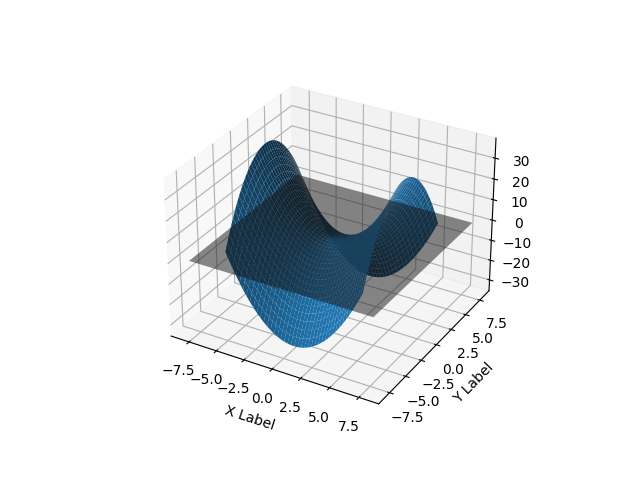

In [78]:
def f(x):
    return x**2 + 2

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

m = 6
ppm = 10
xs = np.linspace(-m, m, 2 * m * ppm)
ys = np.linspace(-m, m, 2 * m * ppm)
X, Y = np.meshgrid(xs, ys)
zs = np.array([f(complex(x, y)).real for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

plane_color = [0.1] * 3 + [0.5]
m_plane = m + 2
xplane = np.meshgrid([-m_plane, m_plane], [-m_plane, m_plane])
ax.plot_surface(xplane[0], xplane[1], xplane[1] * 0, color=plane_color)

ax.plot_surface(X, Y, Z)
fig.show()

Verifying, that conjectured sum/product is sum/product of conjectured

In [79]:
z_1 = 2 + 4j
z_2 = 3 + 8j

print(conj(z_1 * z_2), conj(z_1) * conj(z_2))
print(conj(z_1 + z_2), conj(z_1) + conj(z_2))

(-26-28j) (-26-28j)
(5-12j) (5-12j)


### Block of execrises from Precaluclus book

In [80]:
def f1(x):
    return x**2 + 2j * x - 1
f(0+1j)

def f2(x):
    return 1j * x**2 - 2 * x + 1j

def f2_ex(x):
    return 1j * (x - 1/(1j) + complex(0, sqrt(2)))**2

f2(1/(1j) - complex(0, sqrt(2)))

0j

In [81]:
def f2_ex(x):
    return 1j * (x - 1/(1j) + complex(0, sqrt(2)))**2

f2_ex(1/(1j) - complex(0, sqrt(2)))

(-0-4.930380657631324e-32j)

In [82]:
def ex73_a(x):
    return x**2 - (1 + 1j) * x + (2 + 2j)

(ex73_a(1-1j), ex73_a(0+2j))

(0j, 0j)

In [83]:
def ex74_a(x):
    i = 0 + 1j
    return (x - i) * (x - 1 - i)# * (x + i) * (x + 1 + i)

ex74_a(1)

(-1-1j)

### Visualizing Polynomial with complex parameter

<IPython.core.display.Javascript object>


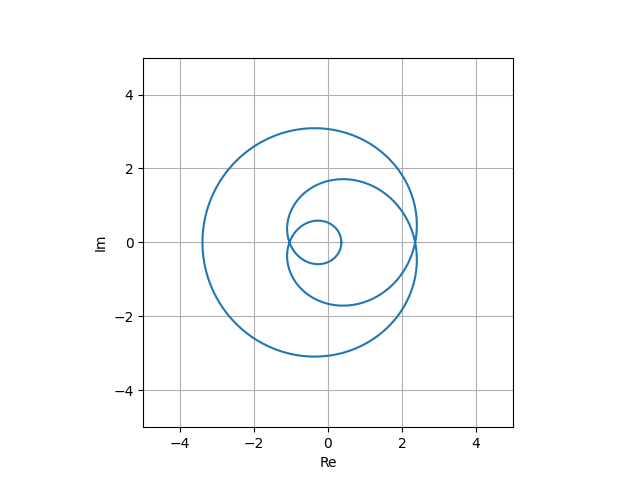

In [84]:
from matplotlib.animation import FuncAnimation
import random as rnd

def setup_axes(ax, xl, yl):
    ax.set_aspect(1)
    ax.set_xlim(-xl, xl)
    ax.set_ylim(-yl, yl)
    ax.grid()
    ax.set_ylabel("Im")
    ax.set_xlabel("Re")  

# fig = plt.figure(figsize=(8, 8), dpi=80)
fig = plt.figure()

ax = plt.axes()
setup_axes(ax, 5, 5)

ln, = plt.plot([], [])

xdata = []
ydata = []
circle = np.linspace(0, 2 * pi, 1024)

def update(n):
    rnd.seed(int(n))
    global xdata, ydata, circle
    xdata = []
    ydata = []
    nth = 3
    f = P([rnd.uniform(-2, 2) for n in range(nth + 1)])
    for angle in circle:
        z_1 = complex_polar(angle, 1)
        z_2 = f(z_1)
        zs = [z_2]
        xdata += [z.real for z in zs]
        ydata += [z.imag for z in zs]
    ln.set_data(xdata, ydata)

rl, rh = 1, 100
ns = np.linspace(rl, rh, (rh - rl) + 1)
ani = FuncAnimation(fig, update, ns, interval=500)
fig.show()

Why "complete" polynomial is always produce circle graph in complex plane?

By "complete" I mean polynomial where all coefficients > 0

Actually this isn't right.

Only polynomial where $ a_n \neq 0 $ and all other coefficients are zero ($ a_0 $ can be anything because it's just translation) produces circle, if set of complex parameters also make circle. 

This is because any complex number can be written in polar form:

$ z = l(cos(\alpha) + i sin(\alpha)) = l * e^{i\alpha} $

And

$ z_1 * z_2 = l_1 * l_2 * (cos(\alpha + \beta) + i sin(\alpha + \beta)) $

So complex number which is result of complex multiplication have angle $ \alpha + \beta $ and have $ l_1 * l_2 $ length.

If we have polynomial $ P(x) = a_n x^n + a_0 $ and if we pass complex number $ z $ into it, then

$ |P(z)| = |z|^n; angle(P(z)) = n * angle(z) $ 

And this is, if we pass "circled" zs into P(x) we got also got circle

This idea is very important for geometric proof of Fundametal Theorem of Algebra

<IPython.core.display.Javascript object>


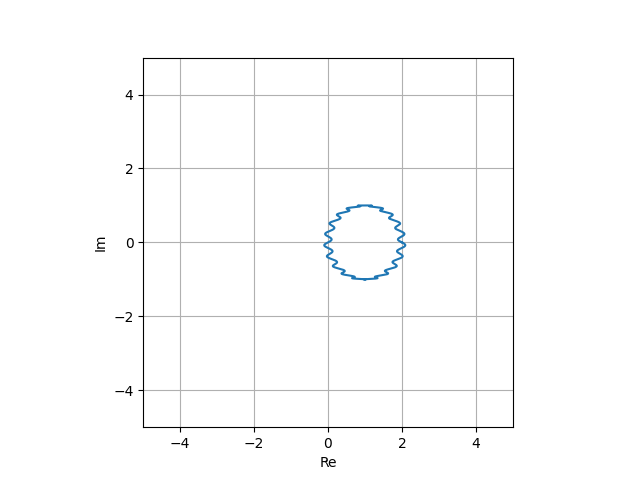

In [117]:
fig = plt.figure()
ax = plt.axes()
r = 5
setup_axes(ax, r, r)

z_radius = 1
# zs = np.vectorize(lambda t: (complex_polar(t, z_radius), t))(np.linspace(0, 2 * pi, 1024))
zs = [(complex_polar(t, z_radius), t) for t in np.linspace(0, 2*pi, 1024)]
# print(zs[0])
# f = lambda z: sin(complex_angle(z)) * z
def f(zt):
    (z, t) = zt
    angle = t
    unit_angle = angle / 0.1
    s = sin(unit_angle - 0.1)
    c = cos(unit_angle + 0.1)
    d = sqrt(s**2 + c**2)
    return z + d

xdata = []
ydata = []
for z in zs:
    fz = f(z)
    xdata.append(fz.real)
    ydata.append(fz.imag)

plt.plot(xdata, ydata)
fig.show()


In [97]:
a = pi + pi/2
(complex_angle(complex_polar(a, 1)), a)

(-1.5707963267948968, 4.71238898038469)

In [118]:
8*3

24